# 3 layer LSTM Encoder Decoder, dropout. 30 day input, 7 day forecast

In [2]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

Using TensorFlow backend.


In [3]:
save_dir = 'models/lstm4'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [9]:
num_input = 30
num_out = 7
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, num_preds=num_out)

train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
train_y_acc = train_y_acc.reshape((train_y.shape[0], train_y.shape[1], 1))
dev_y_acc = dev_y_acc.reshape((dev_y.shape[0], dev_y.shape[1], 1))
test_y_acc = test_y_acc.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)
print("train_y_acc shape", train_y_acc.shape)
print("dev_y_acc shape", dev_y_acc.shape)
print("test_y_acc shape", test_y_acc.shape)


train_X shape (637, 30, 25)
train_y shape (637, 7, 1)
dev_X shape (80, 30, 25)
dev_y shape (80, 7, 1)
test_X shape (80, 30, 25)
test_y shape (80, 7, 1)
train_y_acc shape (637, 7, 1)
dev_y_acc shape (80, 7, 1)
test_y_acc shape (80, 7, 1)


In [6]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=input_shape))
model.add(RepeatVector(num_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))

opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               180800    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 7, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 200)            320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 7, 100)            20100     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 7, 1)              101       
Total params: 521,801
Trainable params: 521,801
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 637 samples, validate on 80 samples
Epoch 1/200
637/637 [==============================] - 3s 5ms/step - loss: 0.0429 - val_loss: 0.0056
Epoch 2/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 3/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 4/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 5/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 6/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 8/200
637/637 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 8.3457e-04
Epoch 9/200
637/637 [===============

637/637 [==============================] - 1s 2ms/step - loss: 2.8885e-04 - val_loss: 0.0020
Epoch 75/200
637/637 [==============================] - 1s 2ms/step - loss: 2.9001e-04 - val_loss: 0.0019
Epoch 76/200
637/637 [==============================] - 1s 2ms/step - loss: 3.5546e-04 - val_loss: 0.0017
Epoch 77/200
637/637 [==============================] - 1s 2ms/step - loss: 3.5368e-04 - val_loss: 0.0016
Epoch 78/200
637/637 [==============================] - 1s 2ms/step - loss: 3.6751e-04 - val_loss: 0.0021
Epoch 79/200
637/637 [==============================] - 1s 2ms/step - loss: 3.1388e-04 - val_loss: 0.0023
Epoch 80/200
637/637 [==============================] - 1s 2ms/step - loss: 3.1056e-04 - val_loss: 0.0020
Epoch 81/200
637/637 [==============================] - 1s 2ms/step - loss: 4.2808e-04 - val_loss: 0.0028
Epoch 82/200
637/637 [==============================] - 1s 2ms/step - loss: 3.5757e-04 - val_loss: 0.0025
Epoch 83/200
637/637 [==============================] - 1s 

Epoch 151/200
637/637 [==============================] - 1s 2ms/step - loss: 1.8371e-04 - val_loss: 0.0025
Epoch 152/200
637/637 [==============================] - 1s 2ms/step - loss: 2.6347e-04 - val_loss: 0.0047
Epoch 153/200
637/637 [==============================] - 1s 2ms/step - loss: 2.5288e-04 - val_loss: 0.0041
Epoch 154/200
637/637 [==============================] - 1s 2ms/step - loss: 2.4485e-04 - val_loss: 0.0030
Epoch 155/200
637/637 [==============================] - 1s 2ms/step - loss: 2.0737e-04 - val_loss: 0.0032
Epoch 156/200
637/637 [==============================] - 1s 2ms/step - loss: 2.9018e-04 - val_loss: 0.0029
Epoch 157/200
637/637 [==============================] - 1s 2ms/step - loss: 2.7181e-04 - val_loss: 0.0035
Epoch 158/200
637/637 [==============================] - 1s 2ms/step - loss: 2.1527e-04 - val_loss: 0.0033
Epoch 159/200
637/637 [==============================] - 1s 2ms/step - loss: 2.0665e-04 - val_loss: 0.0031
Epoch 160/200
637/637 [==============

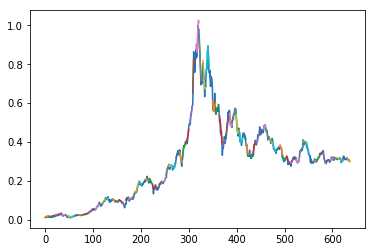

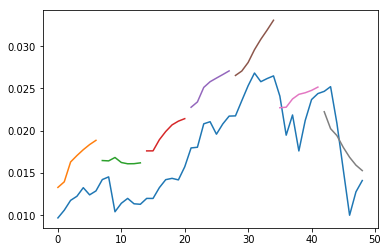

In [16]:
predicted_train = model.predict(train_X).squeeze()
predicted_train = predicted_train[::num_out]
true_train = train_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

utils.plot_results_multiple(predicted_train.tolist()[:7], true_train[:49], num_out)

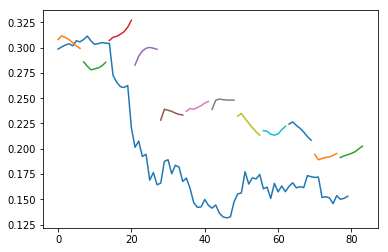

In [17]:
predicted_dev = model.predict(dev_X).squeeze()
predicted_train = predicted_train.reshape(predicted_train.shape[0], -1)
predicted_dev = predicted_dev[::num_out]
true_dev = dev_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

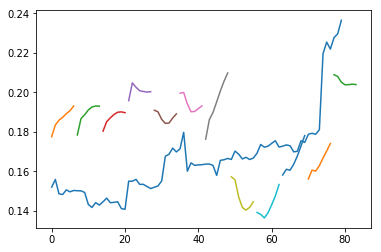

In [18]:
predicted_test = model.predict(test_X).squeeze()
predicted_test = predicted_test[::num_out]
true_test = test_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

In [19]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.00015505207963562414
MSE Dev: 0.0045149903840654634
MSE Test: 0.0011437447249456514


In [20]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.639937106918239
Acc Dev: 0.5063291139240507
Acc Test: 0.5443037974683544


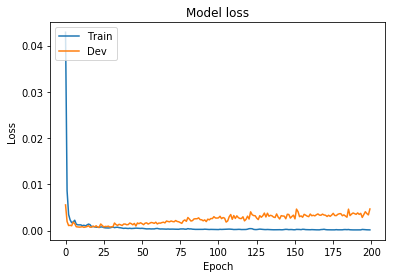

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()